# Predicting heart disease using ML

The notebook aims at building ML models predicting whether someone has heart disease or not. This is how the notebook is structured:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
7. Experimentation

# 1. Problem Definition
Given the clinical parameters about a patient, can a ML model predict whether or not they have a heart disease. The parameters are presented and described in section 4. Features.

The models used are:
- Logistic Regression
- K-Nearest Neighbours Classifier
- Random Forest

# 2. Data
The data is downloaded from Cleavland data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease

# 3. Evaluation
I aim to reach an accuracy of 95% of predicting whether or not a patient has a heart disease for each of the models applied.

# 4. Features
The parameters for each patient in the dataset that are used to determine whether they have a heart disease or not. 

* age in years
* sex (1=male, 0=female)
* cp - chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - fasting blood sugar > 120 mg/dl (1=true, 0=false)
* restecg - resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - diagnosis of heart disease (angiographic disease status)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing

# Importing tools

In [1]:
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics from sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

## Load in data

In [3]:
# load in data
df = pd.read_csv("heart-disease.csv")


In [4]:
df.shape

(303, 14)

## EDA

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

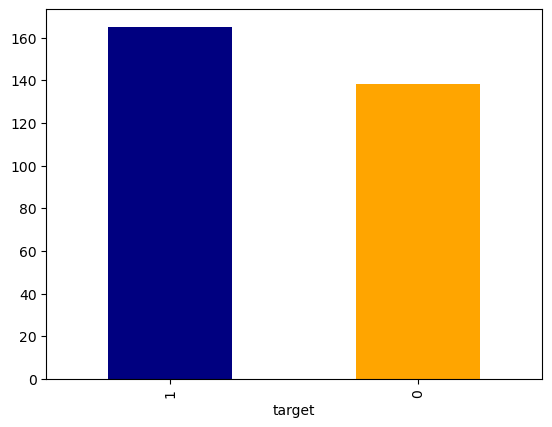

In [7]:
df.target.value_counts().plot(kind="bar", color=["navy", "orange"])
plt.show()
#plt.clf()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# compare target col with sex col
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


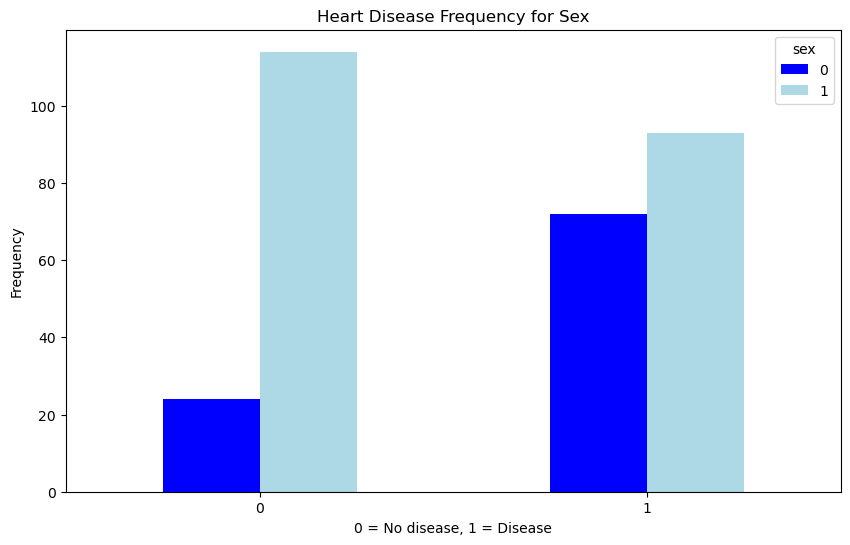

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["blue","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()
#plt.clf()

### Age vs Max heart rate for heart disease

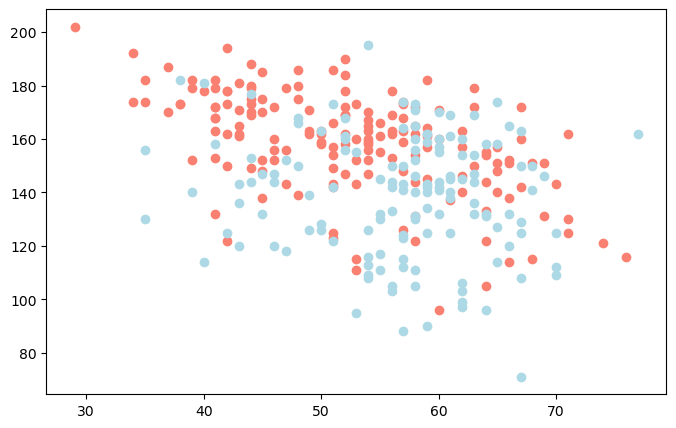

In [14]:
plt.figure(figsize=(8,5))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
            c="salmon"
           )
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
            c="lightblue"
           )

plt.show()
#plt.clf()

### Age distribution

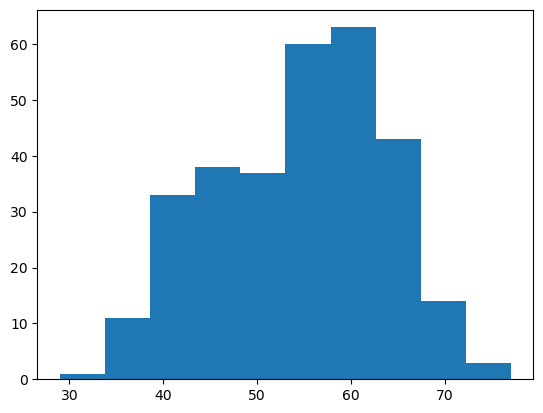

In [15]:
# plotting the distribution of age
plt.hist(df.age)
plt.show()
#plt.clf()

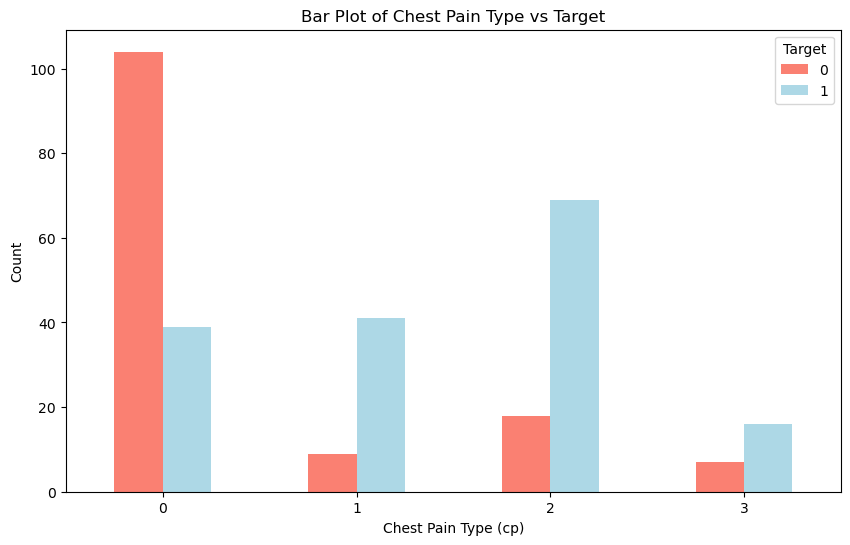

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title('Bar Plot of Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Target', loc='upper right')
plt.show()

### correlation matrix

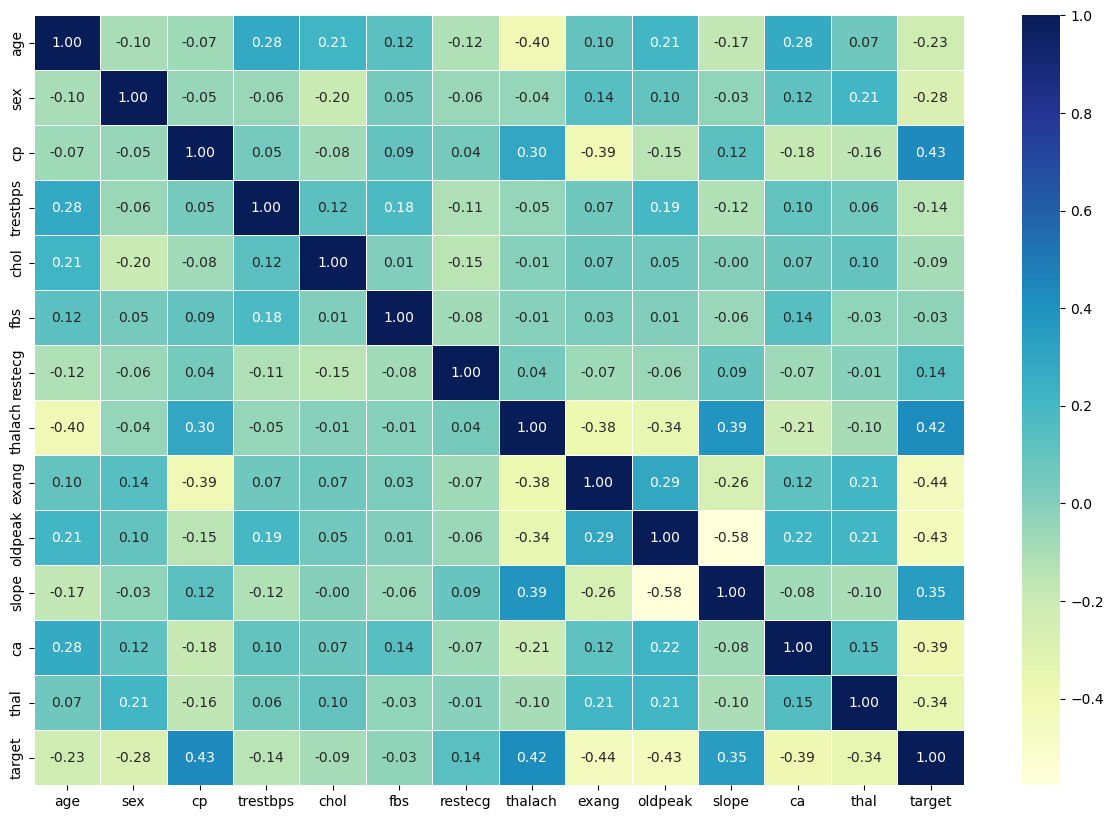

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu",
                ax=ax)

plt.show()

# 5. Modelling


In [18]:
# split data

X = df.drop("target", axis=1)

y = df.target

In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
# split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
len(X), len(X_train), len(X_test)

(303, 242, 61)

In [29]:
#Put models in a dictionary
models = {
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
         }

def fit_and_score(models: dict, X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.Series, y_test: pd.Series) -> dict:
    """
    Fits and evaluates ML models in 'models'.

    Parameters
    ----------
    models: dict
        a dict of different Scikit-learn ML models
    X_train: pd.DataFrame
        training data (no labels)
    X_test: pd.DataFrame
        test data (no labels)
    y_train: pd.Series
        training labels
    y_test: pd.Series
        test labels

    Returns
    -------
    dict
        a dictionary of score for each model in 'models'
    """

    np.random.seed(42)

    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores
    



In [31]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/Users/mathiasgreve/anaconda3/envs/heart-disease/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparison

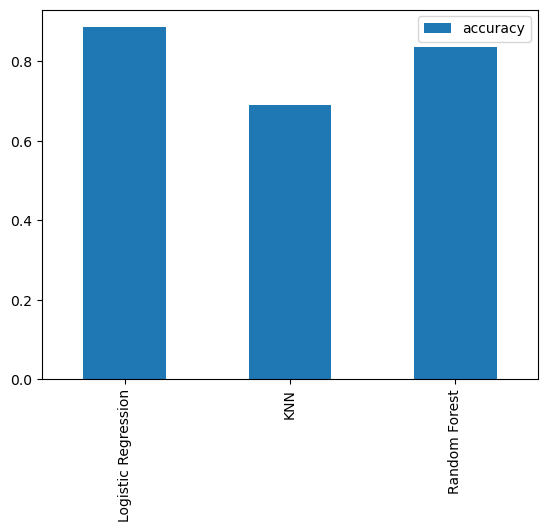

In [34]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

### Improving model

#### Hyperparameter tuning

##### KNN

In [36]:
train_scores = []
test_scores = []

neighbours = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [38]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

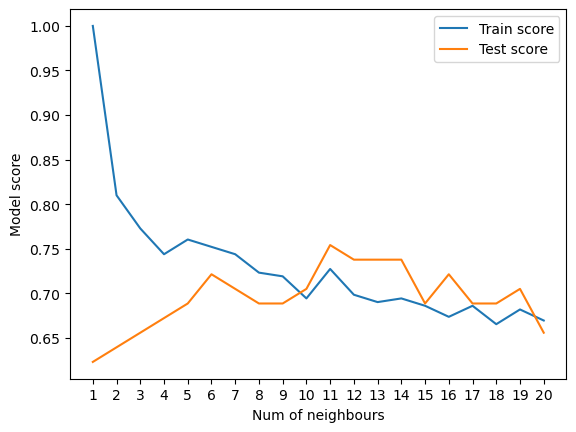

Maximum KNN score on the test data: 75.41%


In [44]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Num of neighbours")
plt.ylabel("Model score")
plt.legend()
plt.show()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [47]:
# finding the optimal neighbour number
neigh_num_optimal = 0
best_neigh_score = 0
for neigh_num, score in zip(neighbours, test_scores):
    if score > best_neigh_score:
        best_neigh_score = score
        neigh_num_optimal = neigh_num

print(f"Optimal num of neighbours: {neigh_num_optimal}")

Optimal num of neighbours: 11


##### RandomizedSearchCV